In [1]:
import sys, pickle
sys.path.insert(0, "libs")

import os, pickle, csv # import packages for file I/O
import time # package to help keep track of calculation time

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

import scipy
import scipy.stats as sst
from scipy.special import comb
from scipy.integrate import simpson
from scipy.signal import argrelextrema
from random import choice

from libs.utils import *
from libs.finiteTheory import *
from visualizations import *
from libs.utils import *
from robustnessSimulations import *
from performanceMeasures import *
from infiniteTheory import *
from finiteTheory import *

fvals = pickle.load(open('data/fvalues.p', 'rb'))
pvals = pickle.load(open('data/Pvalues.p', 'rb'))

In [8]:
trials = 100

In [14]:
auc_sim = np.zeros(trials)
for i_s in range(trials):
    # rlcc_table[i_n][i_p][i_s] = np.zeros(n)
    sim_data = completeRCData(numbers_of_nodes=[10],
                              edge_probabilities=[0.1], num_trials=1,
                              performance='relative LCC', graph_types=['ER'],
                              remove_strategies=['random'])
    rdata_array = np.array(sim_data[0][0][0][0])
    rdata_array = rdata_array[1:]
    for val in []:
        rdata_array[rdata_array == val] = np.nan

    line_data = np.nanmean(rdata_array, axis=0)
    auc_sim[i_s] = scipy.integrate.simpson(line_data, dx=1/(10-1))


mean = np.mean(auc_sim)
std = np.std(auc_sim)

In [15]:
mean

np.float64(0.455556731334509)

In [16]:
std

np.float64(0.12826229466095684)

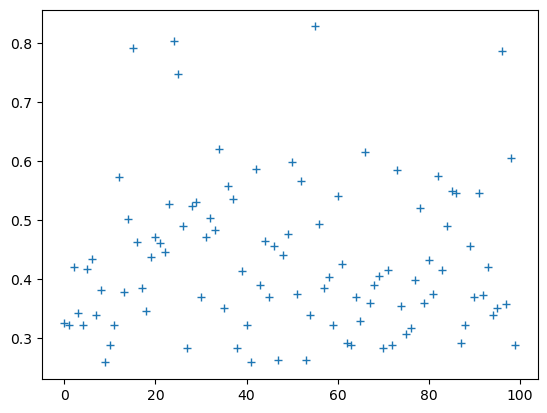

In [12]:
plt.plot(auc_sim, lw=0, marker='+')

(array([14., 25., 18., 14., 11., 10.,  3.,  0.,  1.,  4.]),
 array([0.25922986, 0.31610523, 0.3729806 , 0.42985597, 0.48673133,
        0.5436067 , 0.60048207, 0.65735744, 0.7142328 , 0.77110817,
        0.82798354]),
 <BarContainer object of 10 artists>)

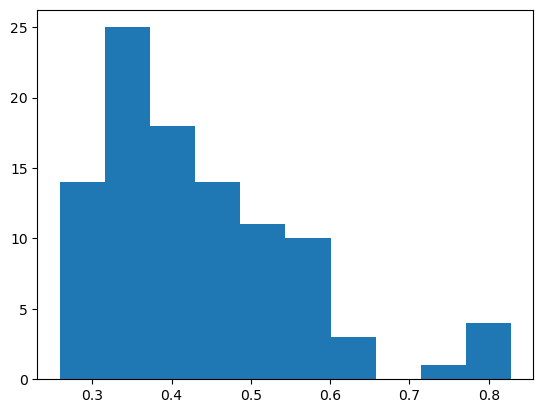

In [13]:
plt.hist(auc_sim)

In [1]:
from libs.utils import *

In [2]:
relSCurve_precalculated(50, 0.05, targeted_removal=False, simulated=False, finite=True)

array([0.94097546, 0.93648507, 0.93159816, 0.92626916, 0.92044408,
       0.91406185, 0.90705321, 0.89933317, 0.89080803, 0.88137484,
       0.87091644, 0.8593144 , 0.84644387, 0.83218781, 0.81644085,
       0.79912428, 0.78019382, 0.75964148, 0.73751977, 0.71392982,
       0.68903202, 0.66303875, 0.63620857, 0.60883399, 0.58122887,
       0.55371369, 0.52660182, 0.50018623, 0.47473123, 0.45046318,
       0.42756899, 0.40619459, 0.38644961, 0.36840976, 0.35212988,
       0.3376503 , 0.32501179, 0.31426342, 0.30546715, 0.29869348,
       0.29400868, 0.29147721, 0.29121632, 0.29358271, 0.29962785,
       0.31209085, 0.3376677 , 0.39326133, 0.53      , 1.        ])